# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
telecom_train_df = pd.read_csv('train (1).csv')
telecom_test_df = pd.read_csv('test (1).csv')
telecom_test_sol_df = pd.read_csv('solution (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [6]:
telecom_train_df.shape

(69999, 172)

In [7]:
telecom_test_df.shape

(30000, 171)

In [8]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [9]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [12]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [13]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [14]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [15]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [16]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [17]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [18]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [19]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [20]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [21]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [22]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [23]:
telecom_train_df.shape

(69999, 144)

In [24]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [25]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [26]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [27]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [28]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [29]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [30]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [31]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [32]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [33]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [34]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [35]:
telecom_train_df.shape

(21013, 141)

In [36]:
# Lets remove not needed newly added features
telecom_train_df.drop(['total_data_recharge_amnt_6', 'total_data_recharge_amnt_7', 'total_data_recharge_amnt_8',
                        'total_recharge_amnt_6', 'total_recharge_amnt_7', 'total_recharge_amnt_8',
                        'average_amnt_6_7'], 
                      axis=1, inplace=True)

## Lets visualize the 8th month and average_amnt_6_7 months data to check behavior pattern of customers

In [37]:
# Look it later
#plt.scatter(telecom_train_df[['average_amnt_6_7', 'total_recharge_amnt_8']])
#plt.show()
#sns.
#telecom_train_df.plot.scatter(x='average_amnt_6_7', y='total_recharge_amnt_8')
#telecom_train_df.DataFrame(np.random.rand(10, 3), columns =['average_amnt_6_7', 'total_recharge_amnt_8'])

#telecom_train_df.plot.bar(x="average_amnt_6_7", y="total_recharge_amnt_8", rot=70);

#ig, ax = plt.subplots()

#ax.plot(telecom_train_df['average_amnt_6_7'], telecom_train_df['total_recharge_amnt_8'])
#plt.show()

## Lets focus on Outliers now and treat them

In [38]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [39]:
#telecom_train_df = remove_outliers(telecom_train_df, telecom_train_df.columns)
#telecom_test_df = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [40]:
telecom_train_df.shape

(21013, 134)

In [41]:
telecom_test_df.shape

(30000, 133)

## Let's check for Data imbalance here

In [42]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [43]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [44]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [45]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [46]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [47]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.337600,0.000000,0.002051,0.000000
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.009660,0.000000,0.000000,0.000000
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.702487,0.000000,0.000000,0.000000
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.0,0.0,0.0,0.000000,0.030303,0.02439,0.542381,0.029661,0.043865,0.039021
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.0,0.0,0.0,0.034483,0.000000,0.00000,0.055301,0.098218,0.000000,0.000000


In [48]:
from imblearn.over_sampling import SMOTE ## Comments to be fixed 

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
X_resampled.shape

(27020, 133)

In [51]:
sum(y_resampled)/len(y_resampled) * 100

50.0

In [52]:
telecom_test_df.shape

(30000, 133)

## Now there is no data imbalance.

In [53]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.132455,0.074824,0.049909,0.004308,0.002480,0.002149,0.007194,0.004771,0.002487,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.365129,0.000000,0.000000,0.0000
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.568220,0.000000,0.000000,0.0000
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023424,0.040694,0.082745,0.0319
3,0.129731,0.080680,0.047931,0.000720,0.000265,0.000000,0.004788,0.030417,0.001714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.256943,0.000000,0.000000,0.0000
4,0.144568,0.093651,0.067145,0.061129,0.074656,0.065164,0.007287,0.003537,0.005294,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068099,0.000000,0.000000,0.0000


## Modelling 

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
    - Lasso
    - Ridge
3. Tree models
    - XGBoost
    - Random Forest

## 1. Logistic Regression using RFE - To get importnat predictors for Churn probability

In [54]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26889
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8753.5
Date:                Sat, 17 Sep 2022   Deviance:                       17507.
Time:                        09:58:04   Pearson chi2:                 1.00e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5807      0.676     -5.299      0.000      -4.905      -2.256
arpu_6                 6.2838      3.810      1.649      0.099      -1.184      13.752
arpu_7                20.0186      4.370      4.581      0.000      11.453      28.584
arpu_8                43.9185      4.950      8.872      0.000      34.216      53.620
onnet_mou_6          -93.0578     35.120     -2.650      0.008    -161.891     -24.225
onnet_mou_7          -11.2748     31.337     -0.360      0.719     -72.694      50.145
onnet_mou_8          -39.6196     46.166     -0.858      0.391    -130.103      50.864
offnet_mou_6         -95.3896     39.456     -2.418      0.016    -172.721     -18.058
offnet_mou_7         -15.6876     25.032     -0.627      0.531     -64.749      33.373
offnet_mou_8        -101.2218     58.681     -1.725      0.085    -216.234      13.791
roam_ic_mou_6          2.4087      1.208      1.994      0.046       0.041       4.777
roam_ic_mou_7          1.8879      1.303      1.449      0.147      -0.667       4.442
roam_ic_mou_8         -2.3356      1.345     -1.736      0.083      -4.972       0.301
roam_og_mou_6         46.3432     17.941      2.583      0.010      11.180      81.507
roam_og_mou_7          8.1326     10.578      0.769      0.442     -12.599      28.864
roam_og_mou_8         37.3555     22.618      1.652      0.099      -6.974      81.685
loc_og_t2t_mou_6   -9735.6111   2.51e+04     -0.388      0.698   -5.89e+04    3.94e+04
loc_og_t2t_mou_7   -1.403e+04   2.84e+04     -0.493      0.622   -6.98e+04    4.17e+04
loc_og_t2t_mou_8    1.846e+05   4.38e+04      4.213      0.000    9.87e+04    2.71e+05
loc_og_t2m_mou_6   -7117.3581   1.83e+04     -0.389      0.697    -4.3e+04    2.88e+04
loc_og_t2m_mou_7   -8639.1911   1.75e+04     -0.493      0.622    -4.3e+04    2.57e+04
loc_og_t2m_mou_8    8.522e+04   2.02e+04      4.214      0.000    4.56e+04    1.25e+05
loc_og_t2f_mou_6    -941.1803   2407.256     -0.391      0.696   -5659.316    3776.956
loc_og_t2f_mou_7   -1543.6780   3133.532     -0.493      0.622   -7685.287    4597.931
loc_og_t2f_mou_8    1.011e+04   2397.991      4.215      0.000    5407.597    1.48e+04
loc_og_t2c_mou_6      -8.3885      1.489     -5.634      0.000     -11.306      -5.470
loc_og_t2c_mou_7      -5.0797      2.575     -1.973      0.049     -10.127      -0.033
loc_og_t2c_mou_8       7.9652      1.565      5.090      0.000       4.898      11.033
loc_og_mou_6        1.727e+04   4.72e+04      0.366      0.714   -7.52e+04     1.1e+05
loc_og_mou_7       -1.185e+04   3.48e+04     -0.340      0.734   -8.01e+04    5.64e+04
loc_og_mou_8       -2.393e+05   5.33e+04     -4.489      0.000   -3.44e+05   -1.35e+05
std_og_t2t_mou_6   -1.169e+05   3.49e+04     -3.348      0.001   -1.85e+05   -4.85e+04
std_og_t2t_mou_7   -4.735e+04      4e+

## Lower the p-value higher the significance

In [55]:
logreg = LogisticRegression()

In [56]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [57]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,

In [58]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 8),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 46),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 48),
 ('roam_ic_mou_8', False, 57),
 ('roam_og_mou_6', False, 18),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 51),
 ('loc_og_t2t_mou_7', False, 44),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 47),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 52),
 ('loc_og_mou_7', False, 31),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 40),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 45),
 ('std

In [59]:
col = X_resampled.columns[rfe.support_]

In [60]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26949
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8993.6
Date:                Sat, 17 Sep 2022   Deviance:                       17987.
Time:                        09:58:30   Pearson chi2:                 1.50e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0812      0.515     -4.041      0.000      -3.091      -1.072
arpu_6                 4.9928      3.357      1.487      0.137      -1.587      11.573
arpu_7                 6.2535      2.471      2.531      0.011       1.410      11.097
arpu_8                36.5173      4.448      8.209      0.000      27.798      45.236
onnet_mou_7          -12.1959      9.998     -1.220      0.223     -31.791       7.399
offnet_mou_6           0.3777      0.801      0.471      0.637      -1.193       1.948
offnet_mou_7         -17.2279      8.170     -2.109      0.035     -33.241      -1.215
offnet_mou_8         -49.8043     10.289     -4.841      0.000     -69.970     -29.639
roam_ic_mou_6          2.8933      0.910      3.181      0.001       1.111       4.676
roam_og_mou_7          9.9739      3.509      2.842      0.004       3.097      16.851
roam_og_mou_8         18.4799      3.043      6.073      0.000      12.516      24.444
loc_og_t2t_mou_8   -1958.0223   3.78e+04     -0.052      0.959    -7.6e+04     7.2e+04
loc_og_t2m_mou_6      -1.4982      1.012     -1.480      0.139      -3.482       0.486
loc_og_t2m_mou_8    -879.1169   1.74e+04     -0.050      0.960    -3.5e+04    3.33e+04
loc_og_t2f_mou_6      -3.4771      1.603     -2.169      0.030      -6.619      -0.335
loc_og_t2f_mou_8    -102.1082   2065.548     -0.049      0.961   -4150.508    3946.292
loc_og_t2c_mou_6      -7.3842      1.257     -5.874      0.000      -9.848      -4.920
loc_og_t2c_mou_7      -7.0570      2.013     -3.506      0.000     -11.002      -3.112
loc_og_t2c_mou_8       8.3545      1.459      5.727      0.000       5.495      11.214
loc_og_mou_8        2010.0664   3.88e+04      0.052      0.959    -7.4e+04     7.8e+04
std_og_t2t_mou_7      -8.1517      2.806     -2.905      0.004     -13.651      -2.652
std_og_t2m_mou_8      44.8980     10.403      4.316      0.000      24.509      65.287
std_og_t2f_mou_7      -1.4070      2.002     -0.703      0.482      -5.331       2.517
std_og_t2f_mou_8     -10.1434      2.832     -3.582      0.000     -15.694      -4.593
std_og_mou_6           2.0108      0.615      3.268      0.001       0.805       3.217
std_og_mou_7           4.6749      1.955      2.392      0.017       0.844       8.506
std_og_mou_8          24.7598     32.578      0.760      0.447     -39.092      88.611
spl_og_mou_8          -2.6733      2.441     -1.095      0.273      -7.457       2.111
total_og_mou_7        19.5389     10.054      1.943      0.052      -0.166      39.244
total_og_mou_8       -34.2162     32.898     -1.040      0.298     -98.694      30.262
loc_ic_t2t_mou_6      13.7742      5.723      2.407      0.016       2.557      24.991
loc_ic_t2t_mou_8    -544.9472   8519.624     -0.064      0.949   -1.72e+04    1.62e+04
loc_ic_t2m_mou_6      14.8906      5.7

### Making predictions on the test set

In [61]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              6304 non-null   float64
 1   arpu_7              6304 non-null   float64
 2   arpu_8              6304 non-null   float64
 3   onnet_mou_7         6304 non-null   float64
 4   offnet_mou_6        6304 non-null   float64
 5   offnet_mou_7        6304 non-null   float64
 6   offnet_mou_8        6304 non-null   float64
 7   roam_ic_mou_6       6304 non-null   float64
 8   roam_og_mou_7       6304 non-null   float64
 9   roam_og_mou_8       6304 non-null   float64
 10  loc_og_t2t_mou_8    6304 non-null   float64
 11  loc_og_t2m_mou_6    6304 non-null   float64
 12  loc_og_t2m_mou_8    6304 non-null   float64
 13  loc_og_t2f_mou_6    6304 non-null   float64
 14  loc_og_t2f_mou_8    6304 non-null   float64
 15  loc_og_t2c_mou_6    6304 non-null   float64
 16  lo

In [62]:
X_test_sm = sm.add_constant(X_test)

In [63]:
y_test_pred = res.predict(X_test_sm)

In [64]:
y_test_pred[:10]

5662     1.0
37574    1.0
58341    1.0
23282    1.0
30561    1.0
45844    1.0
30159    1.0
62778    1.0
45559    1.0
35274    1.0
dtype: float64

In [65]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_og_mou_7,...,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g
5662,1.0,554.740,782.352,673.692,38.63,649.01,845.83,661.89,0.0,0.00,...,0.0,0,0,0,0,0,0,0,1360,0.00
37574,1.0,1563.157,1579.675,1256.565,3158.18,1358.03,1144.44,1327.03,0.0,0.00,...,0.0,0,0,0,0,0,0,0,834,0.00
58341,1.0,594.217,796.737,996.393,1200.53,149.53,186.48,585.36,0.0,0.00,...,0.0,0,0,0,0,0,0,0,594,0.00
23282,1.0,352.160,197.245,365.564,179.88,508.53,116.58,507.64,0.0,34.96,...,0.0,0,0,0,3,0,0,0,1164,0.00
30561,1.0,332.040,275.976,267.033,96.89,152.34,178.24,424.68,0.0,0.00,...,0.0,0,0,0,0,0,0,0,635,31.05


In [66]:
X_resampled_sm.shape

(27020, 71)

In [67]:
y_pred_train = res.predict(X_resampled_sm)

In [68]:
y_pred_train.head()

0    0.998348
1    0.099997
2    0.100593
3    0.042053
4    0.004840
dtype: float64

In [69]:
y_pred_train.shape

(27020,)

## Confusion matrix for Precision and Recall and Accuracy of the model

In [70]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [71]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [72]:
y_pred_train_final.head()

,Churn_Prob
0,0.998348
1,0.099997
2,0.100593
3,0.042053
4,0.004840


In [73]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [74]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11719,  1791],
       [ 1610, 11900]])

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [76]:
# Metrics dict
metrics_dict = {}

In [77]:
def get_accuracy_params(y_actual, y_pred, y_proba, model):
    # Print ROC curve
    auc_score = draw_roc(y_actual, y_proba)
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    print('AUC score: ', auc_score)
    metrics_dict[model] = [accuracy, precision, recall, f1_score, auc_score]
    return metrics_dict

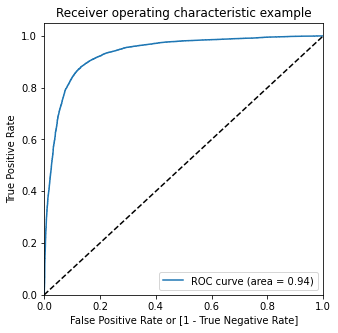

confusion matrix: 
[[11719  1791]
 [ 1610 11900]]
Accuracy:  0.8741302738712066
Precision:  0.8691841355635088
Recall:  0.8808290155440415
F1_score:  0.8749678320649976
AUC score:  0.935220345594814


In [78]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

In [79]:
metrics_dict

{'Logistic_rfe_train': [0.8741302738712066,
  0.8691841355635088,
  0.8808290155440415,
  0.8749678320649976,
  0.935220345594814]}

## With Logistic regression with RFE we get (on train dataset)

- TBD

### Let's check for test data set

In [80]:
telecom_test_df.shape

(30000, 133)

In [81]:
telecom_test_sol_df.shape

(30000, 2)

In [82]:
# Lets do prediction on telecom_test_df dataset

In [83]:
telecom_test_df = telecom_test_df[col]
telecom_test_df = sm.add_constant(telecom_test_df)

In [84]:
y_pred_test = res.predict(telecom_test_df)

In [85]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [86]:
y_pred_test_final.head()

,Churn_Prob
0,0.134691
1,0.283632
2,0.783825
3,0.129759
4,0.281589


In [87]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

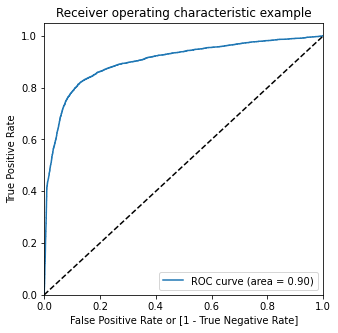

confusion matrix: 
[[21243  5698]
 [  405  2654]]
Accuracy:  0.7965666666666666
Precision:  0.31776819923371646
Recall:  0.8676037920889179
F1_score:  0.4651651914819034
AUC score:  0.9025490532573092


In [88]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

In [90]:
metrics_dict

{'Logistic_rfe_train': [0.8741302738712066,
  0.8691841355635088,
  0.8808290155440415,
  0.8749678320649976,
  0.935220345594814],
 'Logistic_rfe_test': [0.7965666666666666,
  0.31776819923371646,
  0.8676037920889179,
  0.4651651914819034,
  0.9025490532573092]}

### This seems a good model but lets compare with other models.

## PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [91]:
# Looking at the data again

In [92]:
y_resampled.shape

(27020,)

In [93]:
X_resampled.shape

(27020, 133)

In [94]:
pca = PCA(random_state=42)

In [95]:
pca.fit(X_resampled)

PCA(random_state=42)

In [96]:
pca.components_

array([[ 1.53313862e-02,  1.10992270e-02, -6.97007488e-03, ...,
        -2.28113934e-02, -3.73357535e-02, -4.30985978e-02],
       [ 5.00877055e-02,  5.50249444e-02,  3.73963787e-02, ...,
        -2.07969692e-02, -4.11226143e-02, -5.53860383e-02],
       [ 4.82489775e-02,  7.31908792e-02,  6.84757748e-02, ...,
         8.18700856e-02,  1.31398750e-01,  1.41482728e-01],
       ...,
       [ 0.00000000e+00, -1.96945791e-15, -6.09000047e-15, ...,
        -1.54753140e-15,  9.78781834e-16, -6.70483881e-17],
       [ 0.00000000e+00,  1.40078463e-16, -2.96175698e-16, ...,
        -8.95753151e-18,  6.26343856e-17, -6.61573820e-17],
       [-0.00000000e+00,  1.40030644e-17,  7.45022987e-18, ...,
        -4.71491169e-17,  4.90775548e-17, -6.12469177e-17]])

In [97]:
pca.explained_variance_ratio_

array([1.93532890e-01, 1.56022057e-01, 7.54588334e-02, 6.04125810e-02,
       5.29116883e-02, 4.87331684e-02, 4.54258549e-02, 3.26025690e-02,
       2.11815104e-02, 2.00973642e-02, 1.95261696e-02, 1.82498326e-02,
       1.57143830e-02, 1.27472990e-02, 1.23173394e-02, 1.21749037e-02,
       1.08736647e-02, 1.03987433e-02, 1.01319017e-02, 9.58077918e-03,
       8.90667488e-03, 8.35002167e-03, 7.39999852e-03, 7.01667224e-03,
       6.56135093e-03, 6.51606472e-03, 6.27260357e-03, 5.67304269e-03,
       5.39442330e-03, 5.24926279e-03, 4.95051165e-03, 4.57674190e-03,
       4.30705716e-03, 3.88509078e-03, 3.43681937e-03, 3.37312252e-03,
       3.11148420e-03, 2.98760466e-03, 2.92684186e-03, 2.86737321e-03,
       2.80310931e-03, 2.69292903e-03, 2.59815048e-03, 2.50476138e-03,
       2.31891255e-03, 2.20302016e-03, 2.16408746e-03, 2.08020527e-03,
       1.96062405e-03, 1.80632330e-03, 1.76405098e-03, 1.70158225e-03,
       1.66856072e-03, 1.56615003e-03, 1.41719171e-03, 1.38240888e-03,
      

In [98]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

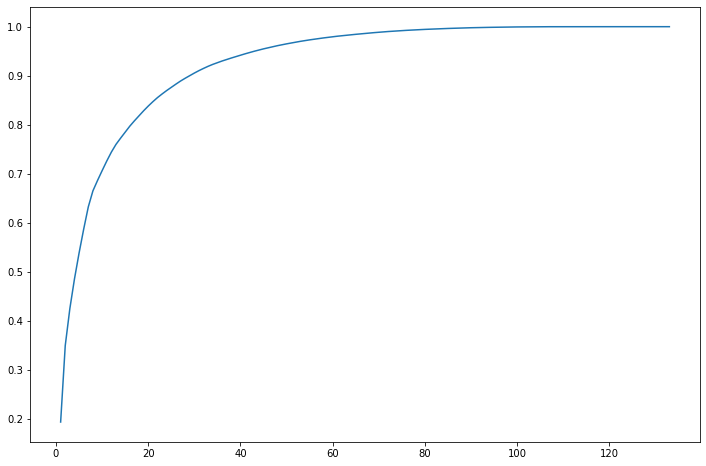

In [99]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [100]:
pca_final = IncrementalPCA(n_components=50)

In [101]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [102]:
df_train_pca.shape

(27020, 50)

In [103]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [104]:
corrmat.shape

(50, 50)

In [105]:
corrmat

array([[ 1.00000000e+00, -2.07850227e-07, -3.97878225e-08, ...,
         3.69218602e-05, -4.48797750e-05,  2.91848880e-05],
       [-2.07850227e-07,  1.00000000e+00,  4.72780534e-08, ...,
         2.84252582e-05, -3.41679477e-05,  5.81730429e-05],
       [-3.97878225e-08,  4.72780534e-08,  1.00000000e+00, ...,
         9.65851238e-06,  1.97470649e-04,  9.44072612e-05],
       ...,
       [ 3.69218602e-05,  2.84252582e-05,  9.65851238e-06, ...,
         1.00000000e+00, -6.30983094e-02,  7.71913685e-02],
       [-4.48797750e-05, -3.41679477e-05,  1.97470649e-04, ...,
        -6.30983094e-02,  1.00000000e+00, -7.21870014e-02],
       [ 2.91848880e-05,  5.81730429e-05,  9.44072612e-05, ...,
         7.71913685e-02, -7.21870014e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [106]:
X_test.shape

(6304, 70)

In [107]:
df_test_pca = pca_final.transform(X_test_ori)
df_test_pca.shape

(6304, 50)

## Applying logistic regression on the data on our Principal components

In [108]:
learner_pca = LogisticRegression()

In [109]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

### Making predictions on the test set

In [110]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [111]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.77'

##### So we could see the accuracy coming close to 77%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

In [112]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final, 'Logistic_pca')

TypeError: get_accuracy_params() missing 1 required positional argument: 'model'

### Ridge and Lasso Regression


#### Ridge Regression

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging we will go ahead with Lasso.

In [ ]:
# Lets do prediction for test data and train data
# train data

In [ ]:
y_train_pred = ridge.predict(X_resampled)
metrics.r2_score(y_true=y_resampled, y_pred=y_train_pred)

In [ ]:
# Prediction for test data 
y_pred_test = ridge.predict(X_resampled)

In [ ]:
y_pred_test